In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [4]:
# Value counts for each feature data
for i in df.columns:
    print(df[i].value_counts())
    print("no of unique values",df[i].nunique())
    print('*****************')

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
no of unique values 3004
*****************
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
no of unique values 12
*****************
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
no of unique values 285
*****************
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
no of unique values 331
*****************
0

In [5]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [6]:

# filling the null value for numerical variables
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())
#Filling the missing values for categorical variables with mode
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] =df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [7]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# EDA

Text(0.5, 0.98, 'Sunshine od Location')

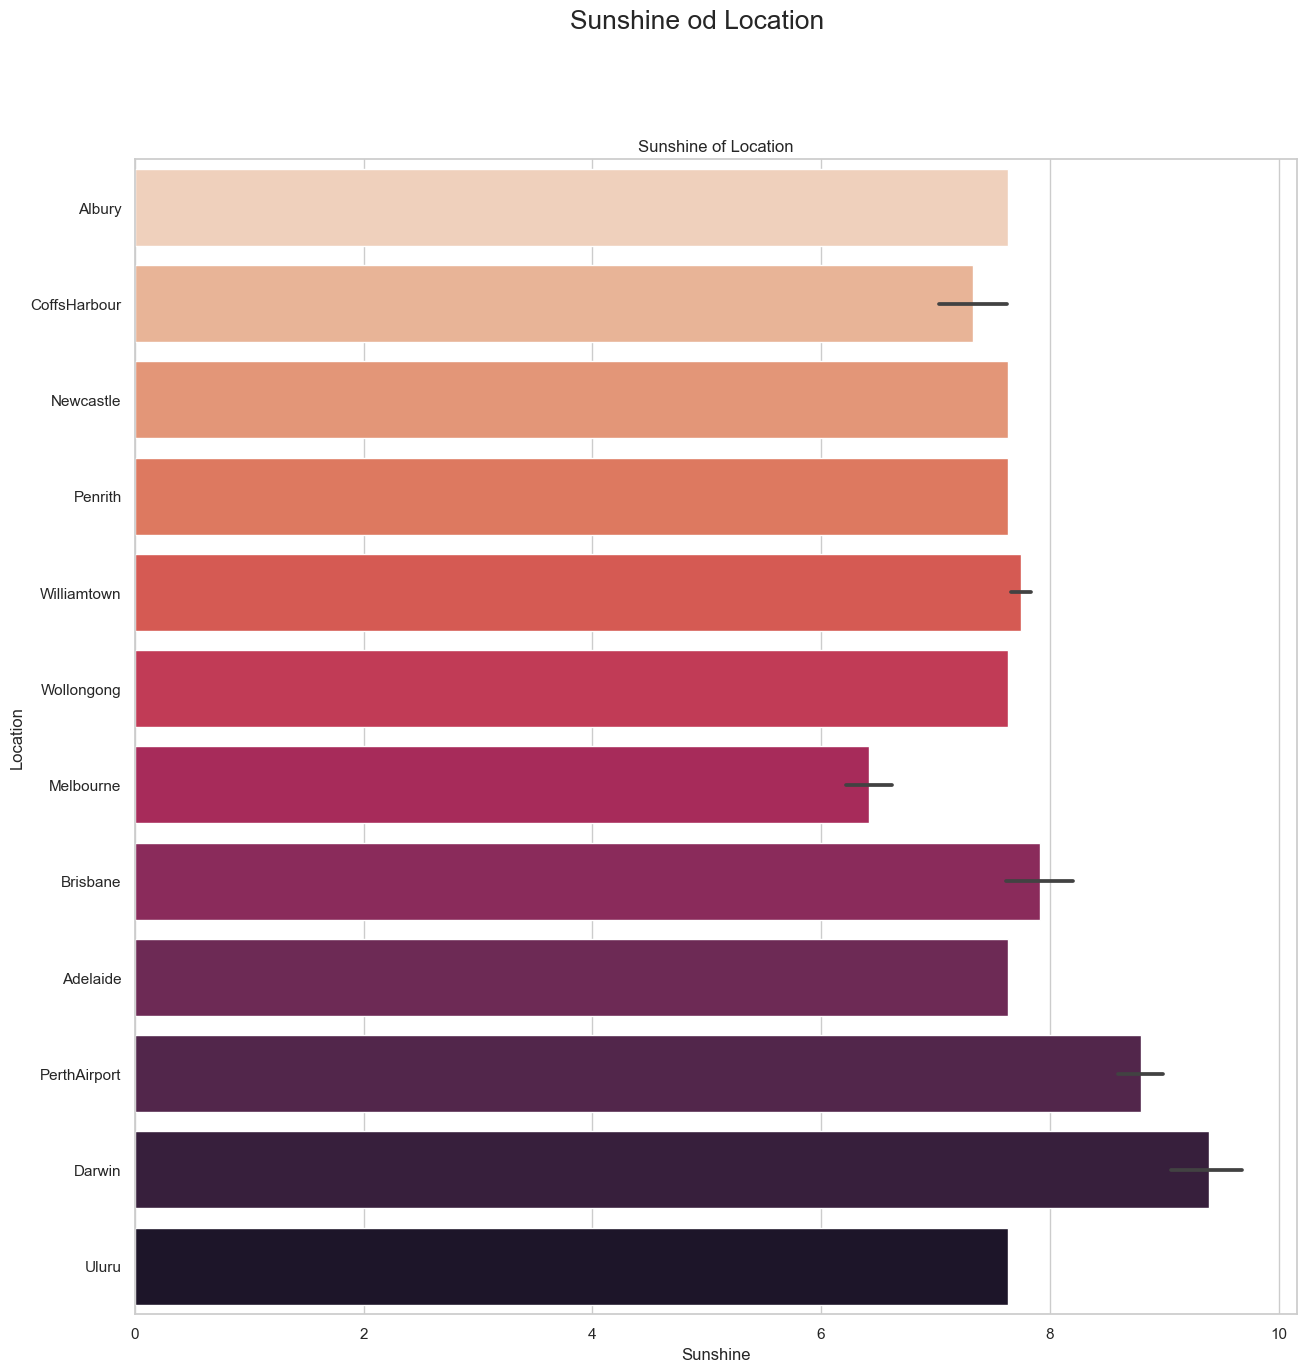

In [8]:
sns.set(style='whitegrid')
plt.figure(2, figsize=(15,15))
plt.subplot(  title='Sunshine of Location')
sns.barplot(x='Sunshine',y='Location', data=df, palette='rocket_r')
plt.suptitle('Sunshine od Location', fontsize=19)

Text(0.5, 0.98, 'Location-Wise Rainfall')

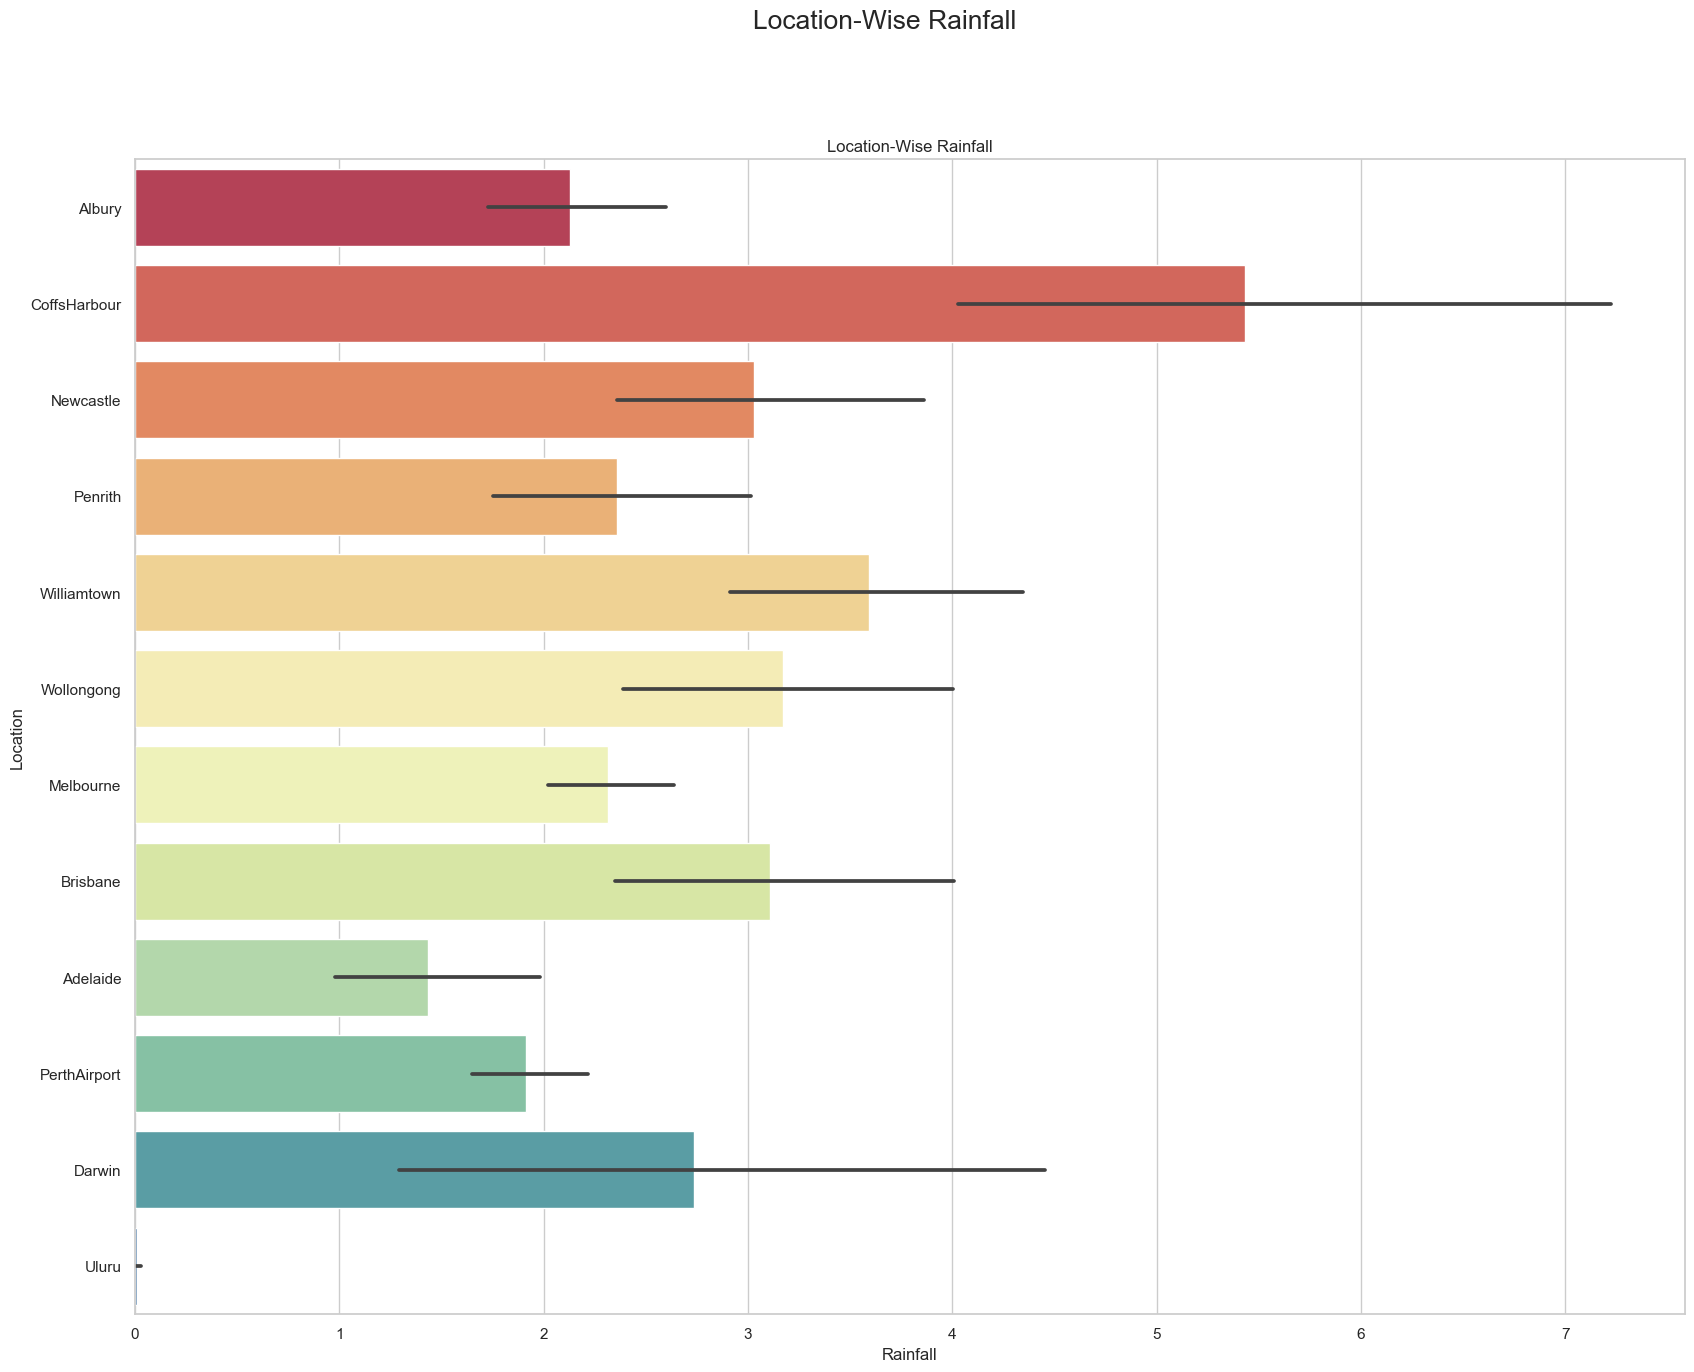

In [9]:
sns.set(style='whitegrid')
#sns.set_color_codes("Spectral")
plt.figure(2, figsize=(20,15))
plt.subplot(  title='Location-Wise Rainfall')
sns.barplot(x='Rainfall',y='Location', data=df, palette='Spectral')
plt.suptitle('Location-Wise Rainfall', fontsize=19)

<AxesSubplot:xlabel='RainToday', ylabel='count'>

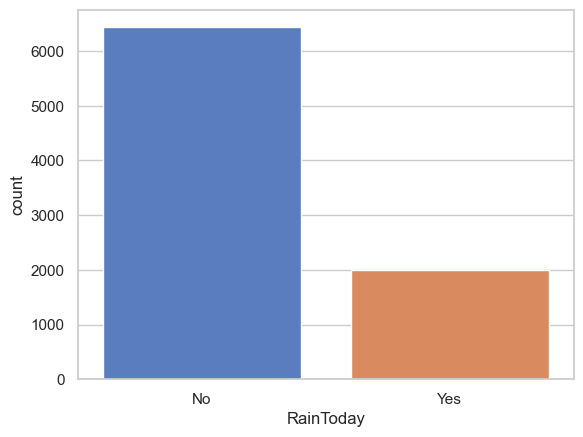

In [10]:
df.RainTomorrow.value_counts()
sns.countplot(x='RainToday',data = df, palette = 'muted')

Text(0, 0.5, 'MaxTemp')

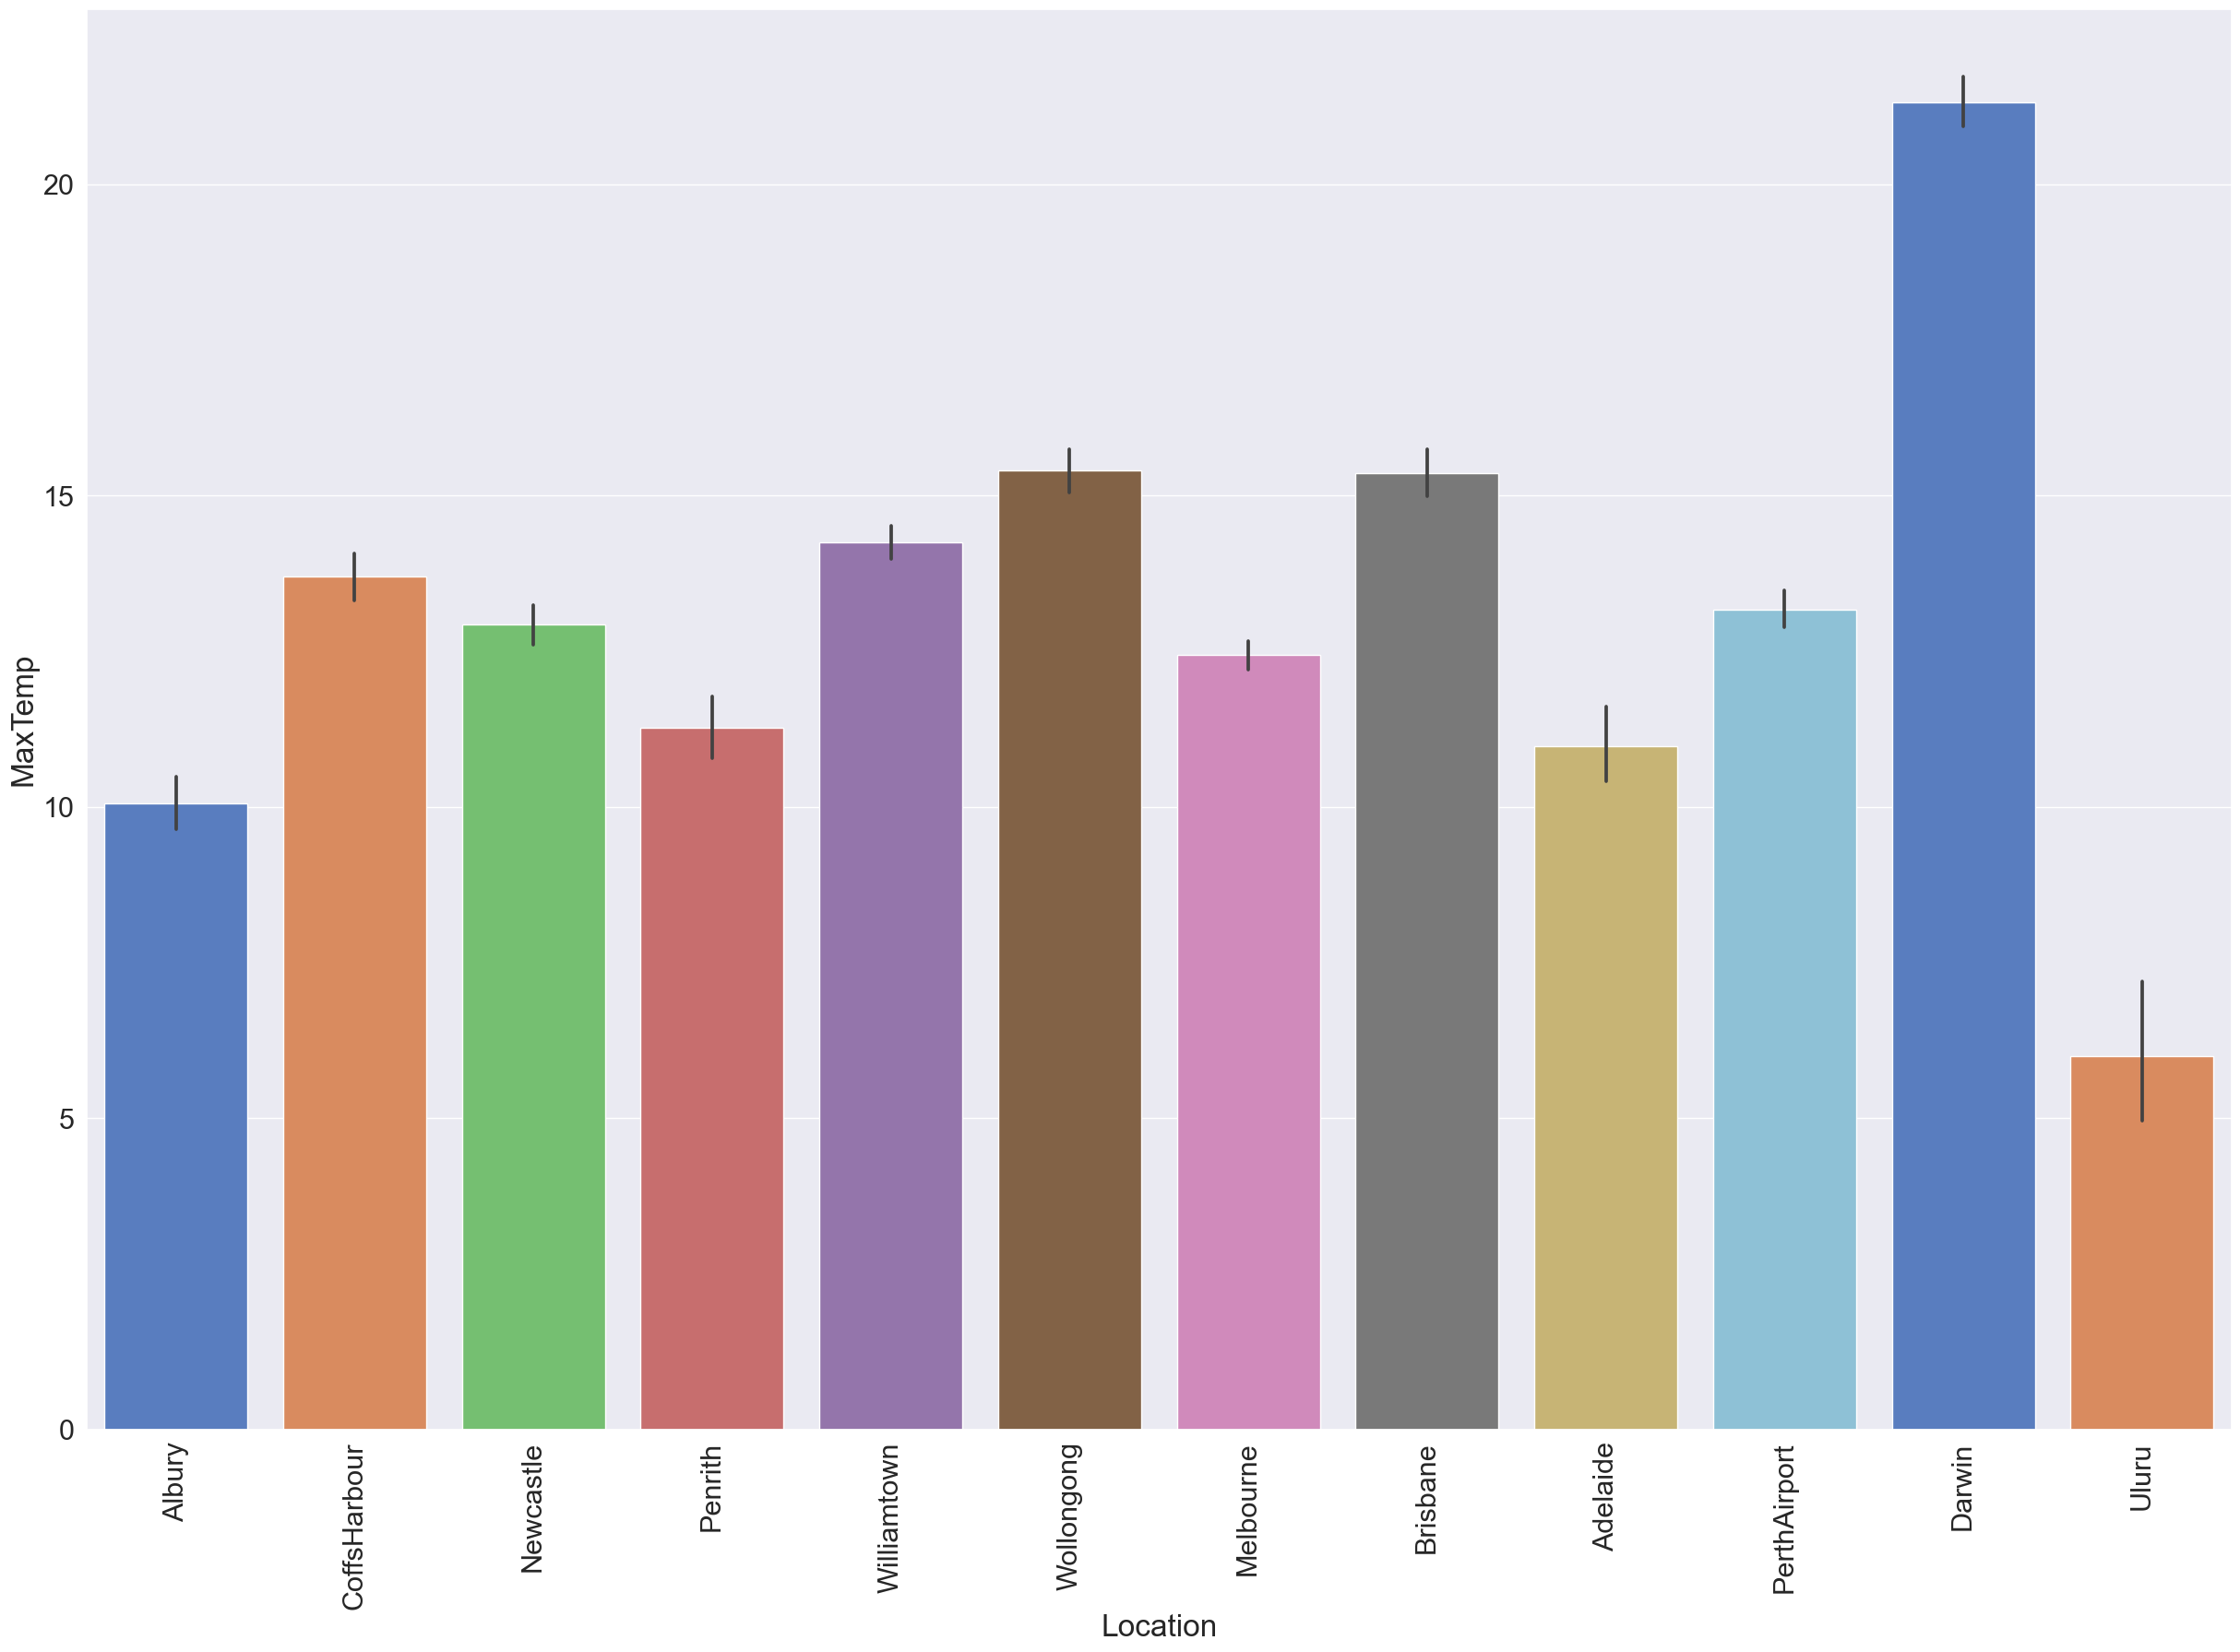

In [11]:
sns.set(font_scale=2)
fig_dims = (30, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="whitegrid")
bax=sns.barplot(x=df["Location"],y=df["MaxTemp"].values,palette="muted")
bax.set_xticklabels(bax.get_xticklabels(), rotation=90)
plt.ylabel('MaxTemp')

Text(0, 0.5, 'MinTemp')

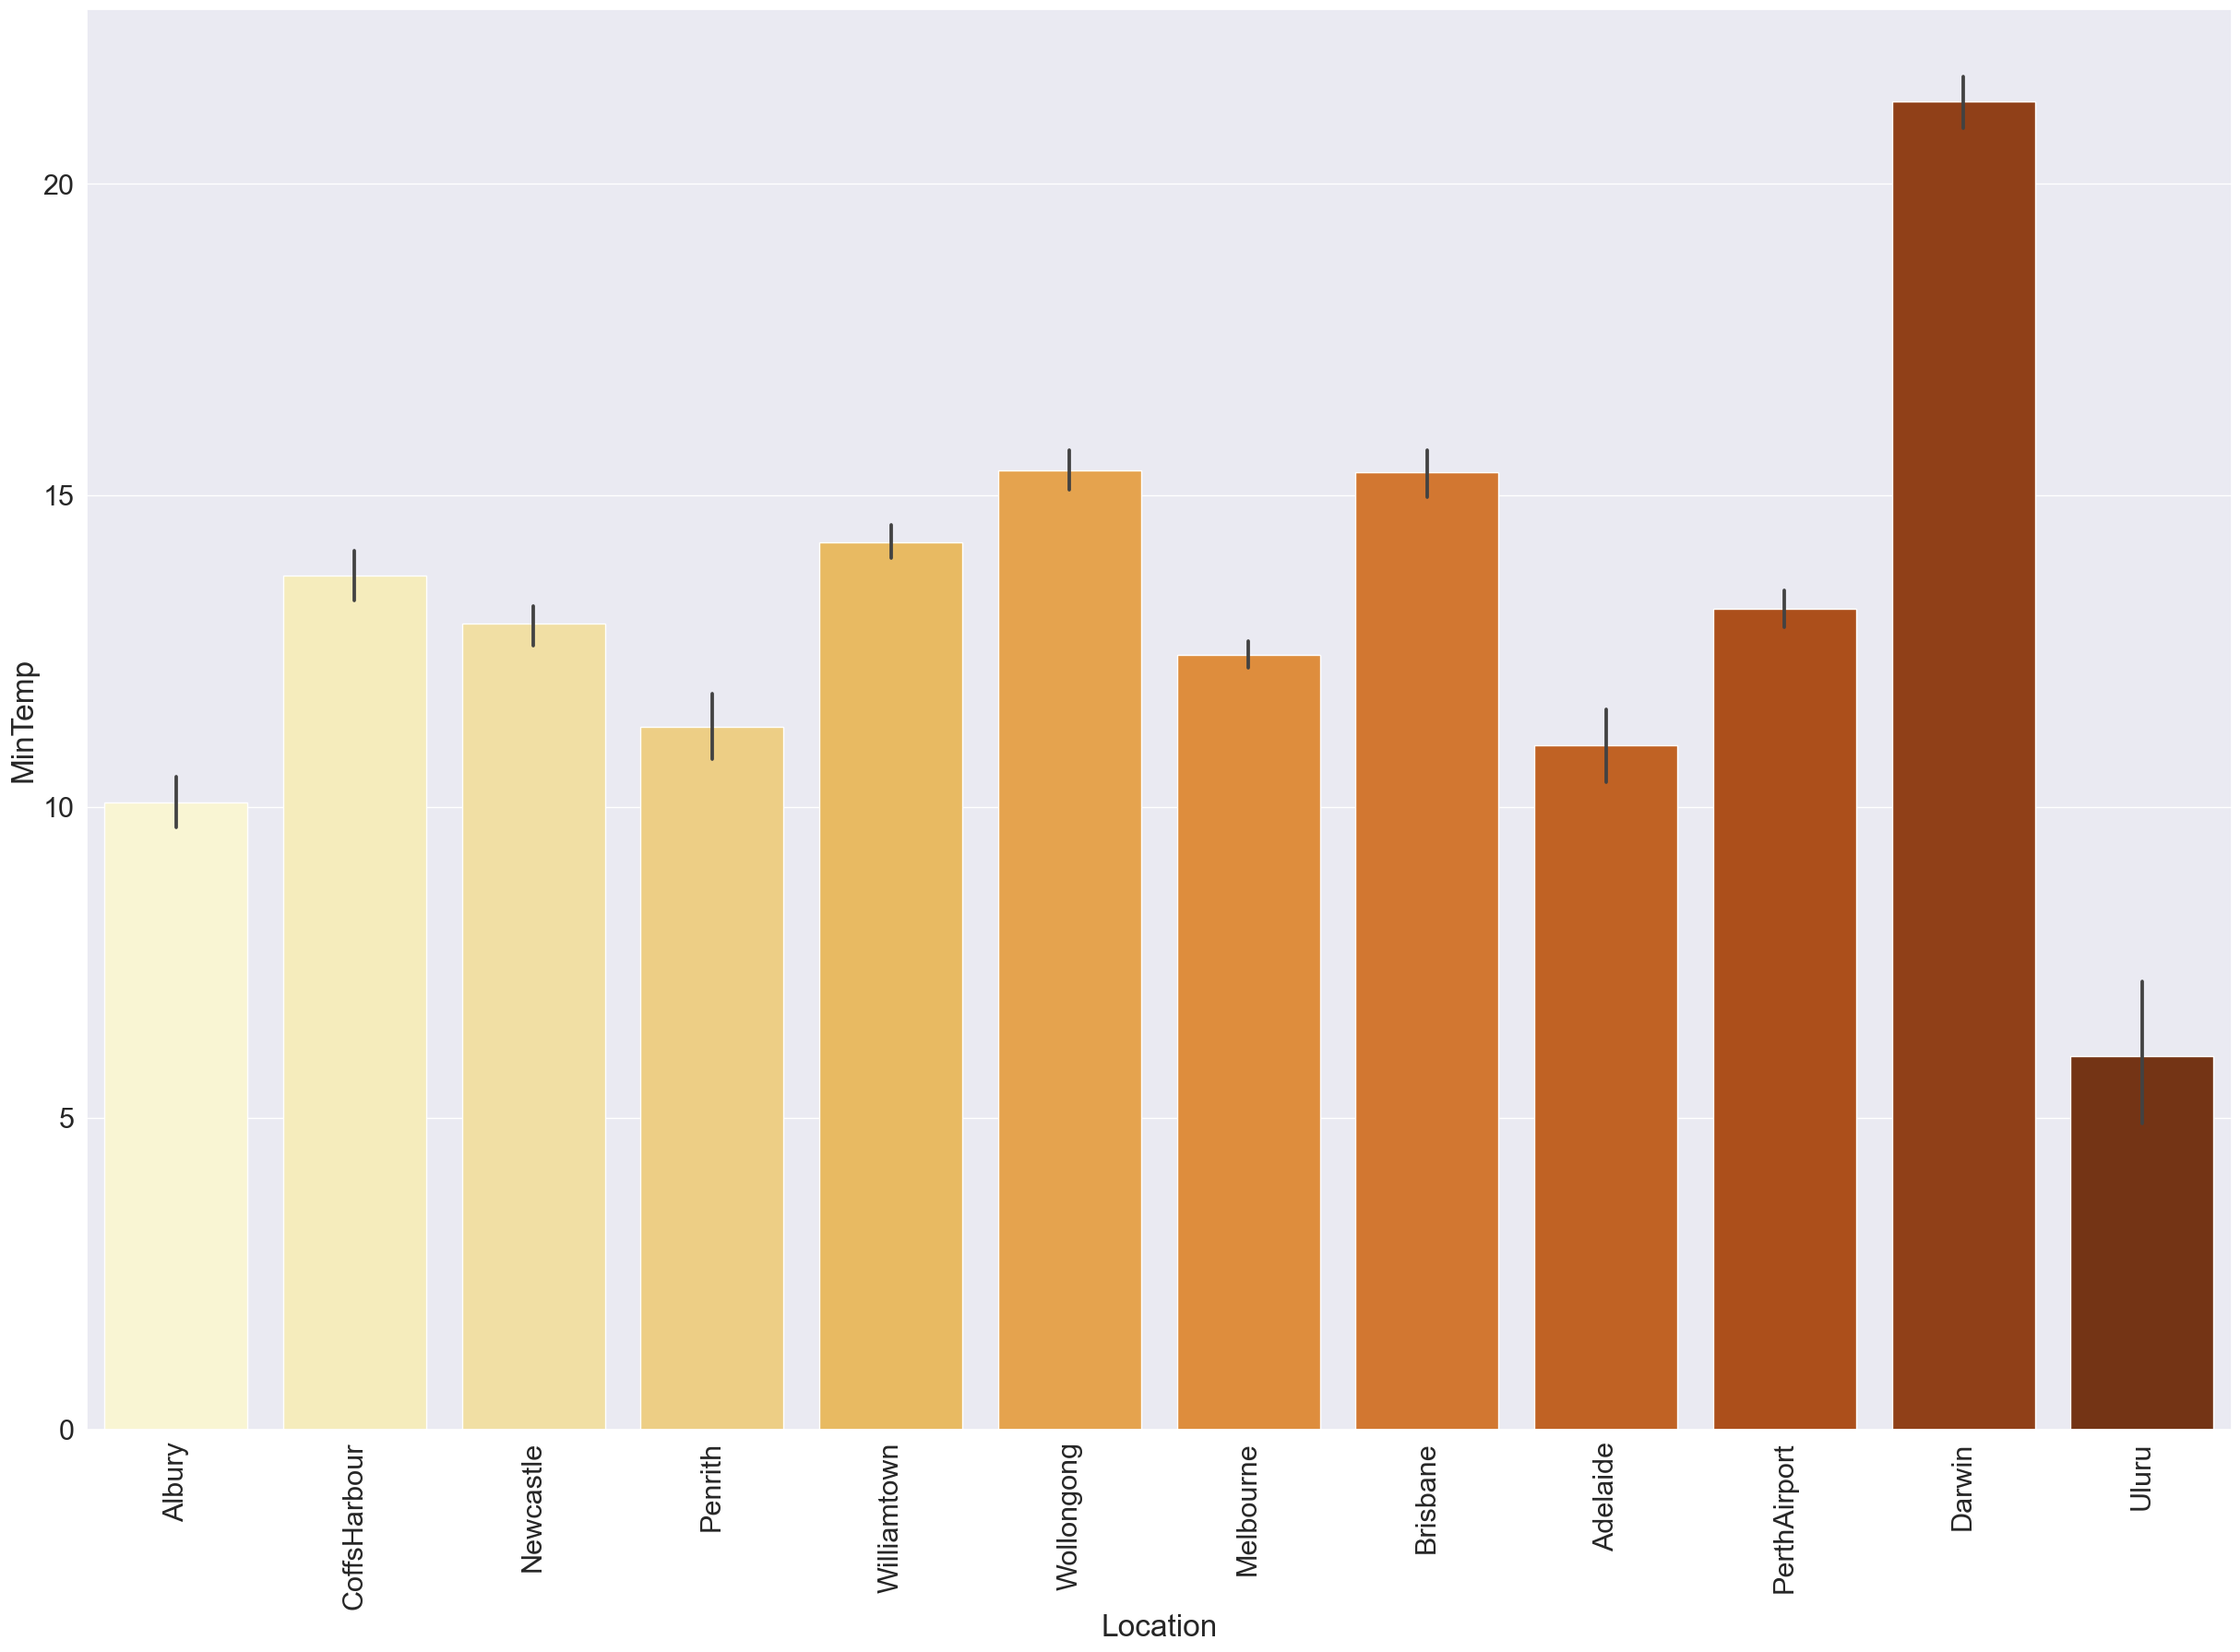

In [12]:
sns.set(font_scale=2)
fig_dims = (30, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="whitegrid")
bax=sns.barplot(x=df["Location"],y=df["MinTemp"].values,palette="YlOrBr")
bax.set_xticklabels(bax.get_xticklabels(), rotation=90)
plt.ylabel('MinTemp')

[Text(0, 0, 'Albury'),
 Text(1, 0, 'CoffsHarbour'),
 Text(2, 0, 'Newcastle'),
 Text(3, 0, 'Penrith'),
 Text(4, 0, 'Williamtown'),
 Text(5, 0, 'Wollongong'),
 Text(6, 0, 'Melbourne'),
 Text(7, 0, 'Brisbane'),
 Text(8, 0, 'Adelaide'),
 Text(9, 0, 'PerthAirport'),
 Text(10, 0, 'Darwin'),
 Text(11, 0, 'Uluru')]

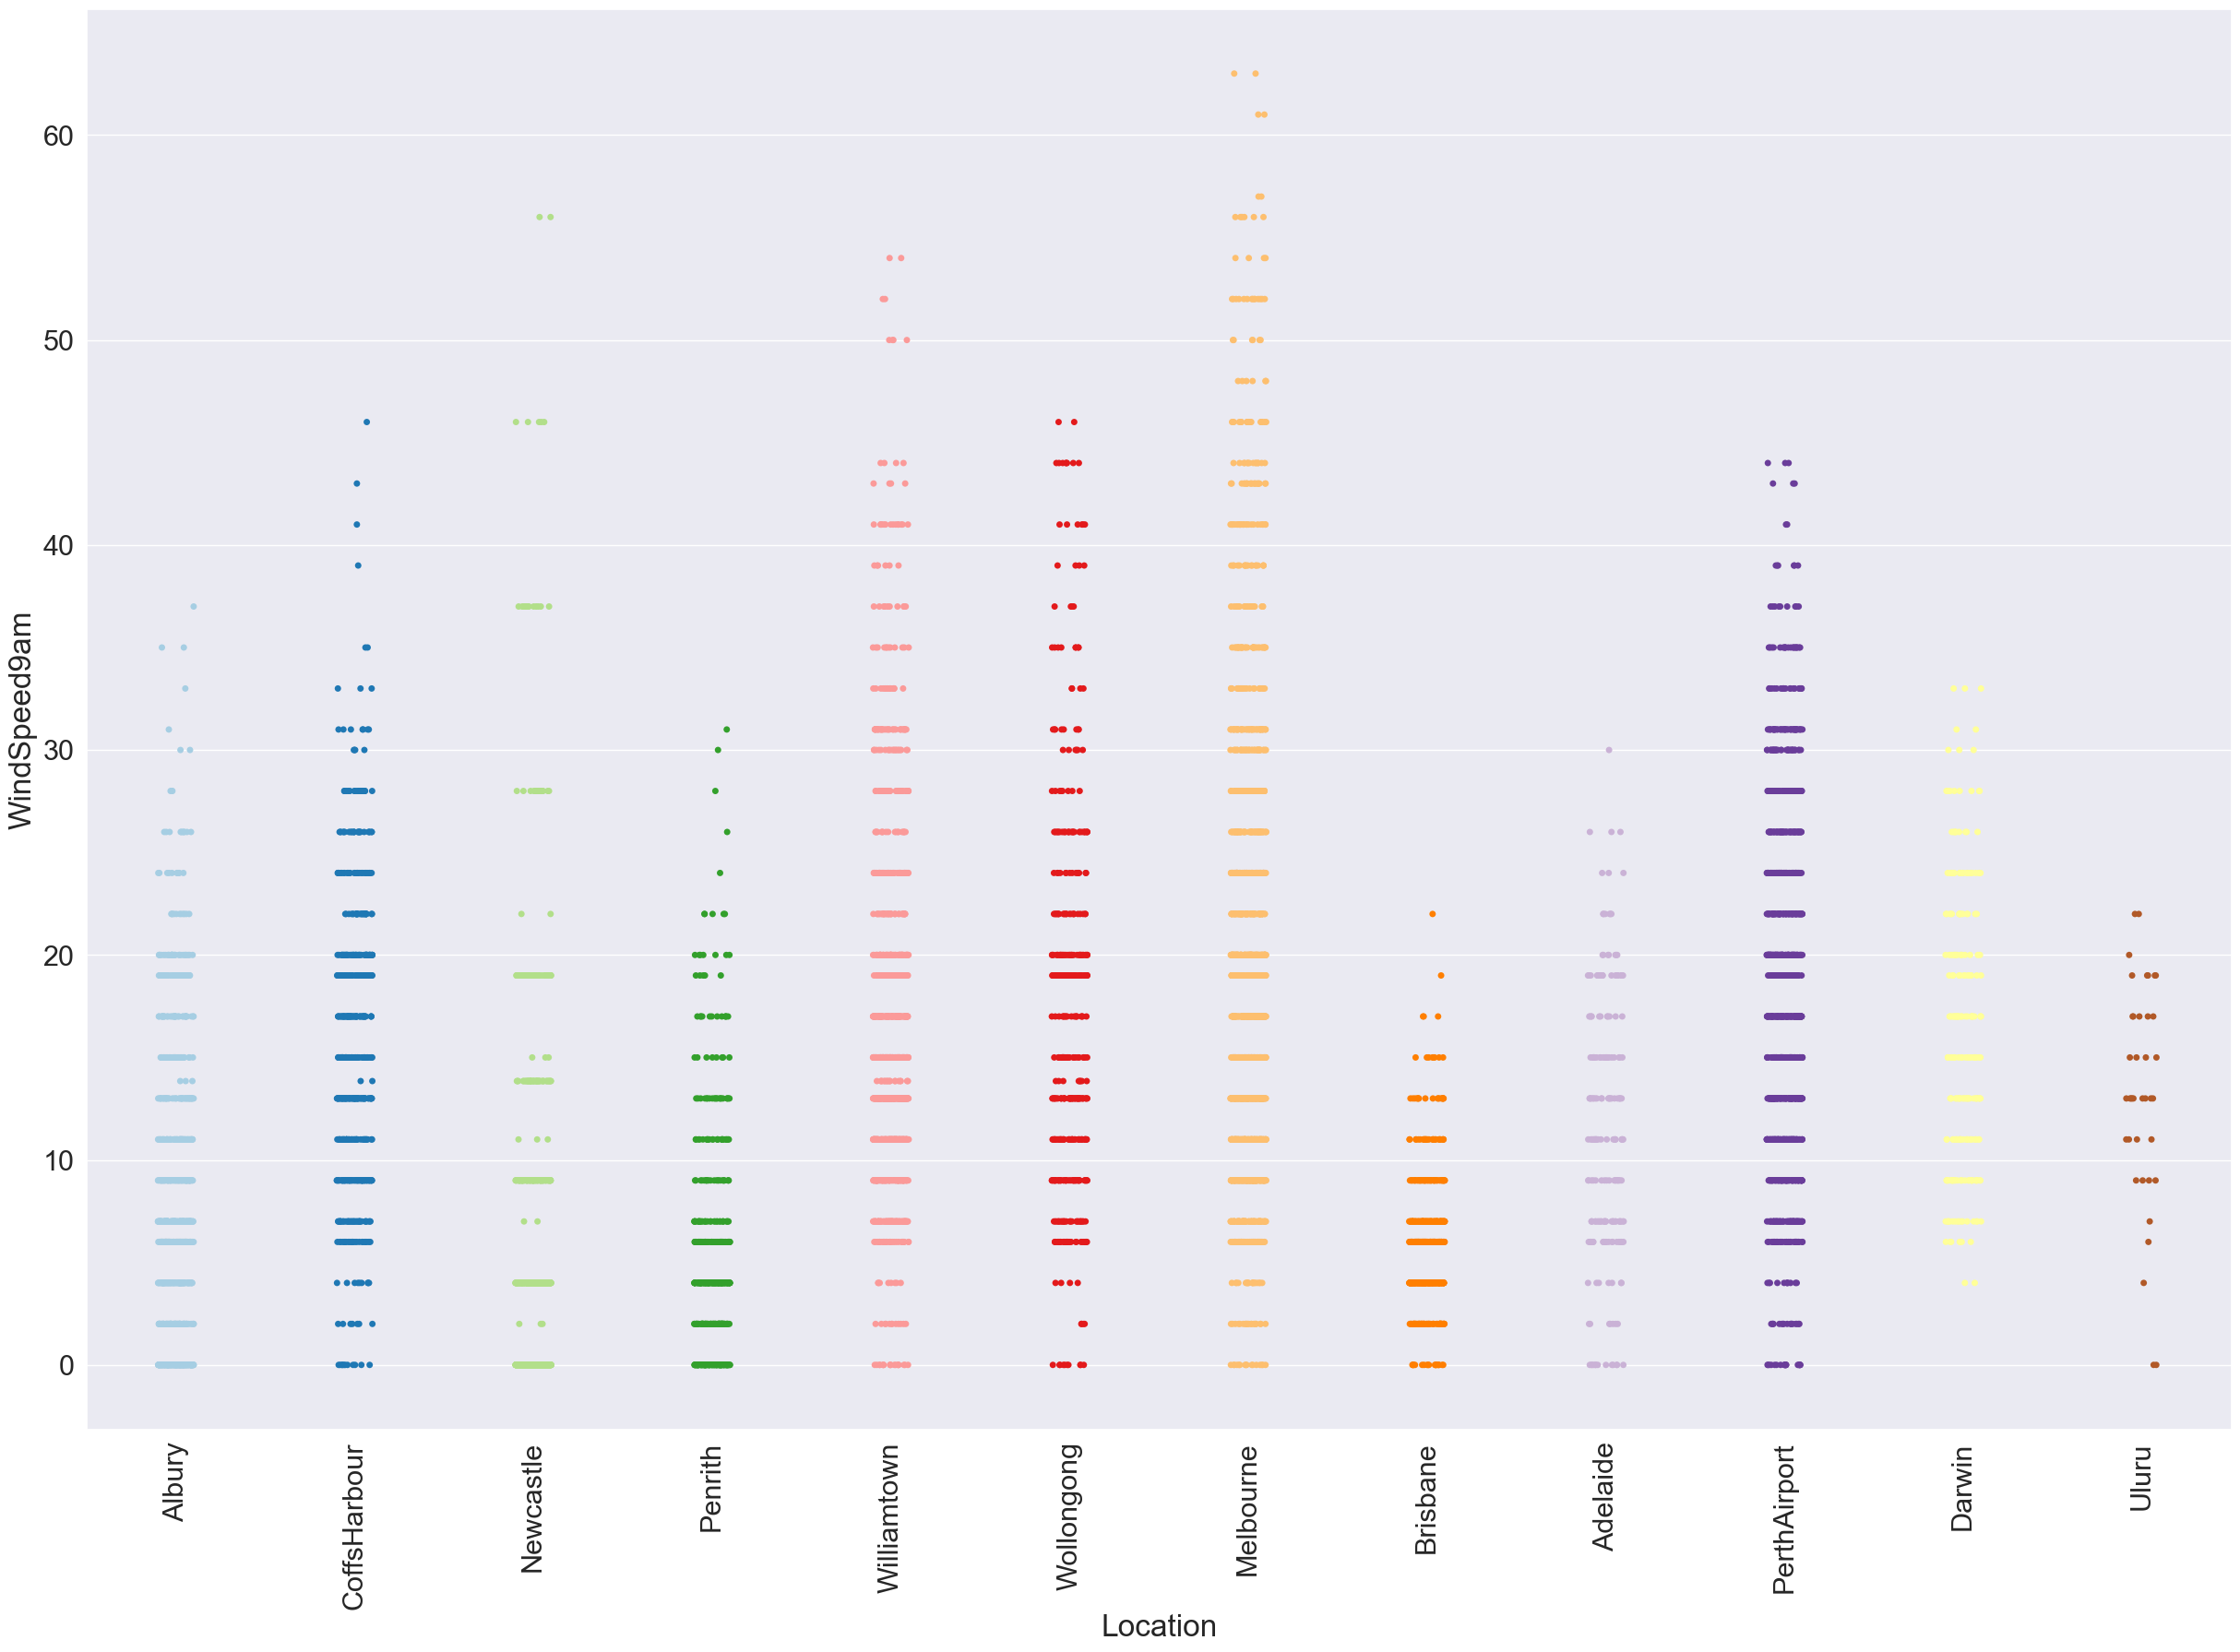

In [13]:
# Set the palette using the name of a palette:
sns.set(font_scale=2)
fig_dims = (30, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_palette("Paired")

# Plot a chart:
bax=sns.stripplot(x="Location", y="WindSpeed9am", data=df)
bax.set_xticklabels(bax.get_xticklabels(), rotation=90)

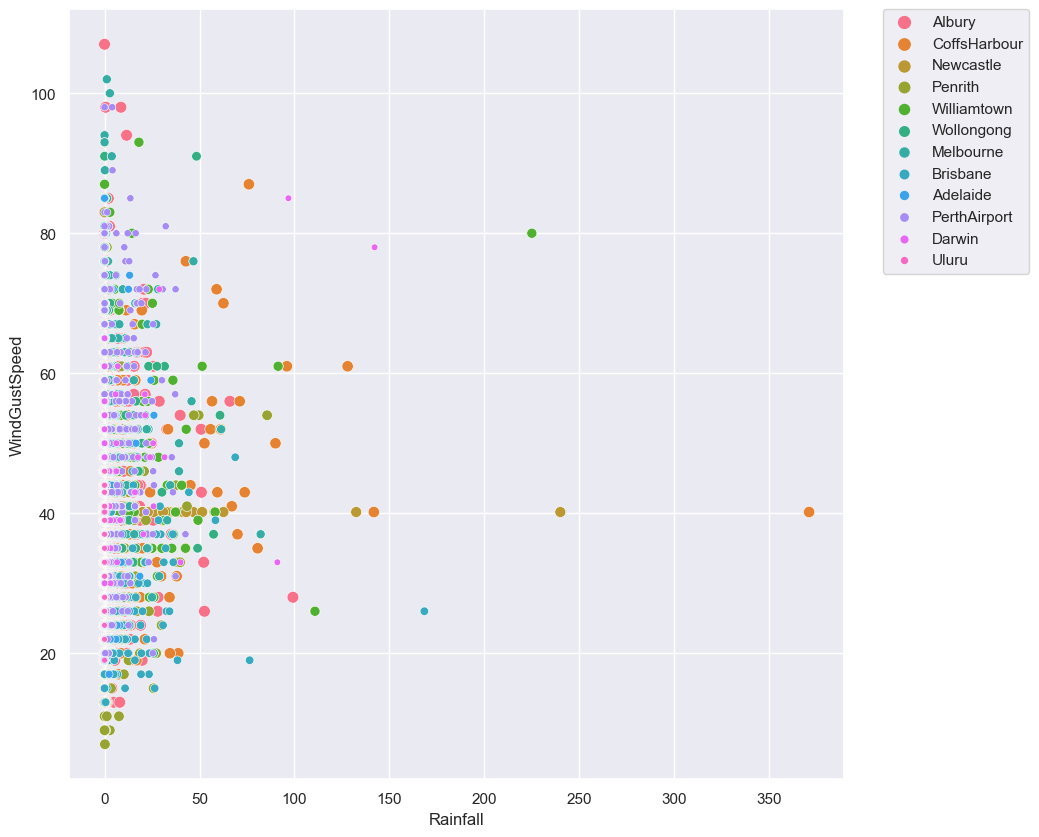

In [14]:
sns.set(font_scale=1)
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x="Rainfall", y="WindGustSpeed",
                      hue="Location", size="Location",
                      data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:>

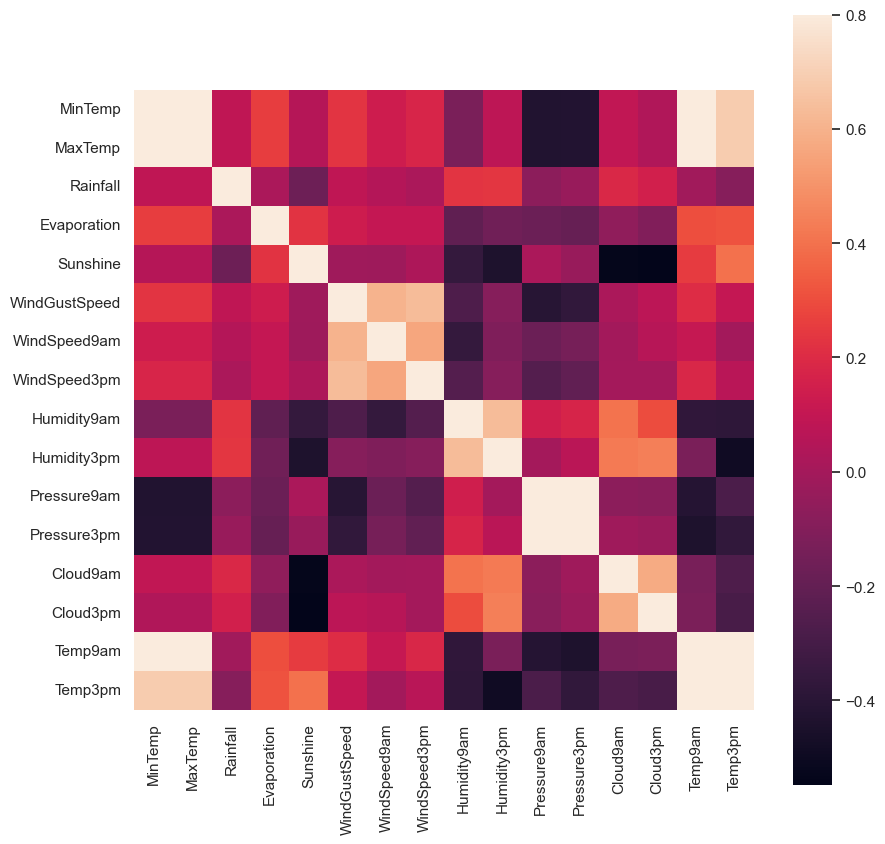

In [15]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

In [16]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

In [18]:
df["WindGustDir"].nunique()

16

Dropping off columns which are not useful for machine learning - Date & Location.

In [19]:
df.drop(["Date","Location"], axis=1, inplace=True)

In [20]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df['WindGustDir']=le.fit_transform(df['WindGustDir'])
df['WindDir9am']=le.fit_transform(df['WindDir9am'])
df['WindDir3pm']=le.fit_transform(df['WindDir3pm'])
df['RainToday']=le.fit_transform(df['RainToday'])
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        8425 non-null   float64
 1   MaxTemp        8425 non-null   float64
 2   Rainfall       8425 non-null   float64
 3   Evaporation    8425 non-null   float64
 4   Sunshine       8425 non-null   float64
 5   WindGustDir    8425 non-null   int32  
 6   WindGustSpeed  8425 non-null   float64
 7   WindDir9am     8425 non-null   int32  
 8   WindDir3pm     8425 non-null   int32  
 9   WindSpeed9am   8425 non-null   float64
 10  WindSpeed3pm   8425 non-null   float64
 11  Humidity9am    8425 non-null   float64
 12  Humidity3pm    8425 non-null   float64
 13  Pressure9am    8425 non-null   float64
 14  Pressure3pm    8425 non-null   float64
 15  Cloud9am       8425 non-null   float64
 16  Cloud3pm       8425 non-null   float64
 17  Temp9am        8425 non-null   float64
 18  Temp3pm 

In [22]:
z=np.abs(zscore(df))
dfn=df[(z<3).all(axis=1)]
dfn

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,13.4,0.6,5.389395,7.632205,13,44.000000,13,14,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,7.4,7.4,0.0,5.389395,7.632205,14,44.000000,6,15,4.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,12.9,12.9,0.0,5.389395,7.632205,15,46.000000,13,15,19.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,9.2,9.2,0.0,5.389395,7.632205,4,24.000000,9,0,11.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,17.5,17.5,1.0,5.389395,7.632205,13,41.000000,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,2.8,0.0,5.389395,7.632205,0,31.000000,9,1,13.0,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,3.6,3.6,0.0,5.389395,7.632205,6,22.000000,9,3,13.0,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,5.4,5.4,0.0,5.389395,7.632205,3,37.000000,9,14,9.0,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0
8423,7.8,7.8,0.0,5.389395,7.632205,9,28.000000,10,3,13.0,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


In [23]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,13.4,0.6,5.389395,7.632205,13,44.000000,13,14,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,7.4,7.4,0.0,5.389395,7.632205,14,44.000000,6,15,4.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,12.9,12.9,0.0,5.389395,7.632205,15,46.000000,13,15,19.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,9.2,9.2,0.0,5.389395,7.632205,4,24.000000,9,0,11.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,17.5,17.5,1.0,5.389395,7.632205,13,41.000000,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,2.8,0.0,5.389395,7.632205,0,31.000000,9,1,13.0,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,3.6,3.6,0.0,5.389395,7.632205,6,22.000000,9,3,13.0,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,5.4,5.4,0.0,5.389395,7.632205,3,37.000000,9,14,9.0,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0
8423,7.8,7.8,0.0,5.389395,7.632205,9,28.000000,10,3,13.0,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


Only 5 % data has been removed in outlier treatment.

In [24]:
df.skew()

MinTemp          -0.089989
MaxTemp          -0.089989
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
dtype: float64

In [25]:
from sklearn.preprocessing import power_transform

for i in dfn.drop(["RainToday","RainTomorrow"],axis=1).columns:
    if abs(dfn[f'{i}'].skew())>0.5:
        dfn[[f'{i}']]=power_transform(dfn[[f'{i}']],method='yeo-johnson')
        print("treated skewness for :",i)
    else:
        continue

treated skewness for : Rainfall
treated skewness for : Evaporation
treated skewness for : Sunshine
treated skewness for : WindGustSpeed
treated skewness for : WindSpeed9am


In [26]:
dfn.skew()

MinTemp         -0.084549
MaxTemp         -0.084549
Rainfall         0.913570
Evaporation      0.074744
Sunshine        -0.066262
WindGustDir      0.112339
WindGustSpeed    0.003128
WindDir9am       0.160081
WindDir3pm      -0.126255
WindSpeed9am    -0.111481
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
RainToday        1.301170
RainTomorrow     1.296077
dtype: float64

<AxesSubplot:xlabel='RainToday', ylabel='count'>

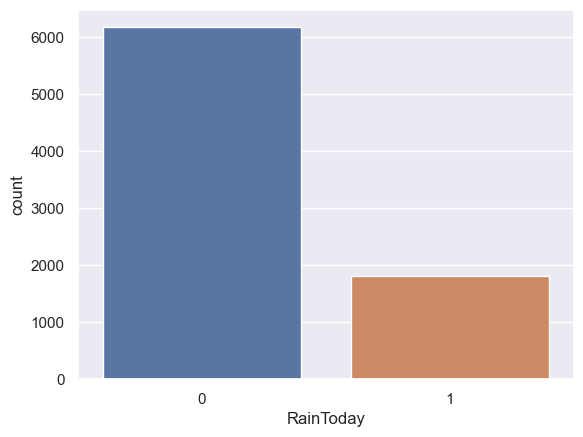

In [27]:
sns.countplot(data=dfn, x='RainToday')

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

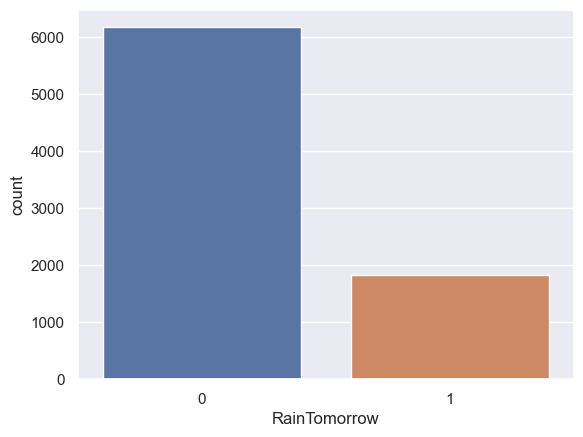

In [28]:
sns.countplot(data=dfn, x='RainTomorrow')

# To forecast whether or not it will rain tomorrow.

In [29]:
#Applying SMOTE for upscaling

from imblearn.over_sampling import SMOTE
smt=SMOTE()
train_x,train_y=smt.fit_resample(dfn.iloc[:,:-1],dfn.iloc[:,-1])

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

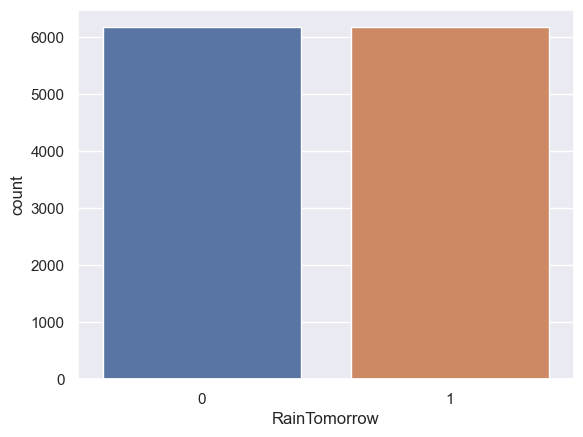

In [30]:
sns.countplot(train_y)

## Scaling of Independent features

In [31]:
X=dfn.iloc[:,:-1]
y=dfn.iloc[:,-1]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rfc.fit(x_train,y_train)
   
    rfc_predict_test=rfc.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{accuracy_score(y_test,rfc_predict_test)}')
    
    print('\n')

At random state 0, The training accuracy is :-0.886107634543179


At random state 1, The training accuracy is :-0.9030037546933667


At random state 2, The training accuracy is :-0.8961201501877347


At random state 3, The training accuracy is :-0.8961201501877347


At random state 4, The training accuracy is :-0.9086357947434293


At random state 5, The training accuracy is :-0.8936170212765957


At random state 6, The training accuracy is :-0.8886107634543179


At random state 7, The training accuracy is :-0.8923654568210263


At random state 8, The training accuracy is :-0.8948685857321652


At random state 9, The training accuracy is :-0.8867334167709637


At random state 10, The training accuracy is :-0.89549436795995


At random state 11, The training accuracy is :-0.8948685857321652


At random state 12, The training accuracy is :-0.8710888610763454


At random state 13, The training accuracy is :-0.8973717146433041


At random state 14, The training accuracy is :-0.905506883604

At random state 80, The training accuracy is :-0.9105131414267835

In [33]:
# Split 80-20 train vs test data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=80)

In [34]:
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(6389, 20) (6389,)
(1598, 20) (1598,)


In [35]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()

accuracy score for  LogisticRegression() is :  0.8385481852315394 
 [[1157   95]
 [ 163  183]] 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1252
           1       0.66      0.53      0.59       346

    accuracy                           0.84      1598
   macro avg       0.77      0.73      0.74      1598
weighted avg       0.83      0.84      0.83      1598
 

Cross Validation Score is : [0.85524257 0.82629108 0.83098592 0.82550861 0.82458888]
Mean Score : 0.8325234098404051


accuracy score for  GaussianNB() is :  0.7891113892365457 
 [[1029  223]
 [ 114  232]] 
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      1252
           1       0.51      0.67      0.58       346

    accuracy                           0.79      1598
   macro avg       0.71      0.75      0.72      1598
weighted avg       0.82      0.79      0.80      1598
 

Cross Validation Score is : [0.796557

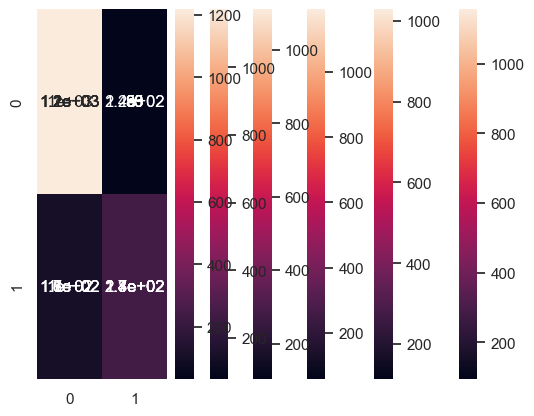

In [36]:
model=[lg,gnb,svc,dtc,knn,rfc]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print("accuracy score for ",m,"is : ",accuracy_score(test_y,predm),"\n",confusion_matrix(test_y,predm),"\n",classification_report(test_y,predm),"\n")
    sns.heatmap(confusion_matrix(test_y,predm),annot=True)
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("==============================================\n\n\n====================================================")

In [38]:
dict2={"n_estimators":[50,100,150,200],"criterion":['gini', 'entropy', 'log_loss'],"min_samples_split":[2,3,4]}
gv=GridSearchCV(rfc,dict2, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'gini', 'min_samples_split': 4, 'n_estimators': 100}

In [40]:
rfc_f=RandomForestClassifier(n_estimators=100, criterion='gini' , min_samples_split= 4)
rfc_f.fit(train_x,train_y)
prf=rfc_f.predict(test_x)
print(accuracy_score(test_y,prf))
score=cross_val_score(rfc_f,train_x,train_y,cv=4)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

0.9098873591989988
Cross Validation Score is : [0.89173967 0.85472761 0.86412023 0.88040075]
Mean Score : 0.8727470664253925


In [41]:
import joblib
joblib.dump(rfc_f,"rain_tomorrow_svc.obj")

['rain_tomorrow_svc.obj']

In [42]:
rfc_l=joblib.load('rain_tomorrow_svc.obj')

In [44]:
result=rfc_l.predict(test_x)
print(accuracy_score(test_y,result))

0.9098873591989988


In [45]:
dfn

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,13.4,0.617396,0.186311,-0.097439,13,0.433926,13,14,0.784361,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,7.4,7.4,-0.693670,0.186311,-0.097439,14,0.433926,6,15,-0.983463,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,12.9,12.9,-0.693670,0.186311,-0.097439,15,0.579399,13,15,0.700314,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,9.2,9.2,-0.693670,0.186311,-0.097439,4,-1.257142,9,0,-0.063397,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,17.5,17.5,0.975076,0.186311,-0.097439,13,0.209370,1,7,-0.541317,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,2.8,-0.693670,0.186311,-0.097439,0,-0.605532,9,1,0.146229,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,3.6,3.6,-0.693670,0.186311,-0.097439,6,-1.460065,9,3,0.146229,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,5.4,5.4,-0.693670,0.186311,-0.097439,3,-0.103212,9,14,-0.290718,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0
8423,7.8,7.8,-0.693670,0.186311,-0.097439,9,-0.874832,10,3,0.146229,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


In [46]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,13.4,0.6,5.389395,7.632205,13,44.000000,13,14,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,7.4,7.4,0.0,5.389395,7.632205,14,44.000000,6,15,4.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,12.9,12.9,0.0,5.389395,7.632205,15,46.000000,13,15,19.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,9.2,9.2,0.0,5.389395,7.632205,4,24.000000,9,0,11.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,17.5,17.5,1.0,5.389395,7.632205,13,41.000000,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,2.8,0.0,5.389395,7.632205,0,31.000000,9,1,13.0,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,3.6,3.6,0.0,5.389395,7.632205,6,22.000000,9,3,13.0,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,5.4,5.4,0.0,5.389395,7.632205,3,37.000000,9,14,9.0,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0
8423,7.8,7.8,0.0,5.389395,7.632205,9,28.000000,10,3,13.0,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


# To predict how much rainfall could be there

### Outlier and skewness Treatment

In [47]:
z=np.abs(zscore(df))
dfc=df[(z<3).all(axis=1)]
dfc

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,13.4,0.6,5.389395,7.632205,13,44.000000,13,14,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,7.4,7.4,0.0,5.389395,7.632205,14,44.000000,6,15,4.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,12.9,12.9,0.0,5.389395,7.632205,15,46.000000,13,15,19.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,9.2,9.2,0.0,5.389395,7.632205,4,24.000000,9,0,11.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,17.5,17.5,1.0,5.389395,7.632205,13,41.000000,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,2.8,0.0,5.389395,7.632205,0,31.000000,9,1,13.0,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,3.6,3.6,0.0,5.389395,7.632205,6,22.000000,9,3,13.0,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,5.4,5.4,0.0,5.389395,7.632205,3,37.000000,9,14,9.0,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0
8423,7.8,7.8,0.0,5.389395,7.632205,9,28.000000,10,3,13.0,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


In [48]:
dfc.skew()

MinTemp         -0.084549
MaxTemp         -0.084549
Rainfall         3.488446
Evaporation      0.846181
Sunshine        -0.723970
WindGustDir      0.112339
WindGustSpeed    0.506897
WindDir9am       0.160081
WindDir3pm      -0.126255
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
RainToday        1.301170
RainTomorrow     1.296077
dtype: float64

### Scaling of Independent features

In [82]:
#X=dfc[["MinTemp","MaxTemp","Evaporation","Sunshine"]]
X=dfc.drop(["Rainfall"],axis=1)
y=dfc["Rainfall"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

In [83]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.4856453894598751
At random state 0, The test accuracy is :-0.4975504675167626


At random state 1, The training accuracy is :-0.49270868441944604
At random state 1, The test accuracy is :-0.48329743758136856


At random state 2, The training accuracy is :-0.49469810976208484
At random state 2, The test accuracy is :-0.47855416333686795


At random state 3, The training accuracy is :-0.4856597815421856
At random state 3, The test accuracy is :-0.49698283042137614


At random state 4, The training accuracy is :-0.49169818085655537
At random state 4, The test accuracy is :-0.48305142253474376


At random state 5, The training accuracy is :-0.49722740884748806
At random state 5, The test accuracy is :-0.4738143476812533


At random state 6, The training accuracy is :-0.49344330013152604
At random state 6, The test accuracy is :-0.4796285611880623


At random state 7, The training accuracy is :-0.4977691438298273
At random state 7, The test ac

At random state 49, The training accuracy is :-0.5017966429991261
At random state 49, The test accuracy is :-0.4658508034900183

In [84]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=49)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(5351, 20) (5351,)
(2636, 20) (2636,)


In [85]:
lr=LinearRegression()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()

In [96]:
param ={
       'fit_intercept':[True, False],
      'copy_X':[True, False],
     'n_jobs':[2,3],
    'positive':[True, False],
}

In [98]:
RF_grid=GridSearchCV(LinearRegression(),param,cv=4,scoring='accuracy',verbose=2)

RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

RF_grid.best_params_

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=3, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=3, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=3, positive=True; total ti

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 2, 'positive': True}

In [100]:
LR= LinearRegression(copy_X= True, fit_intercept=True, n_jobs=2, positive=True) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=49)
LR.fit(x_train,y_train)
LR_predict_train=LR.predict(x_train)
LR_predict_test=LR.predict(x_test)
print('The r2 score is:', r2_score(test_y, pred))
print('The mean absolute error', mean_absolute_error(test_y, pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(test_y,pred)))

The r2 score is: 0.5364968771573746
The mean absolute error 1.3708942721745074
root_mean_squared_error: 3.318880595288759


In [102]:
import joblib
joblib.dump(LR,"rainfall_lr.obj")

['rainfall_lr.obj']

In [103]:
lr_l=joblib.load('rainfall_lr.obj')